<!-- <table>
  <tr>
    <td><img src="https://raw.githubusercontent.com/DrPBaksh/image_processing/main/logos/logo_2.png?raw=true" alt="Corndel" width="301.5" height="216"></td>
    <td><img src="https://github.com/CorndelDataAnalyticsDiploma/workshop/blob/master/Corndel%20Digital%20Logo%20Centre.png?raw=true" alt="Corndel" width="301.5" height="216"></td>
  </tr>
</table> -->


<img src="https://raw.githubusercontent.com/DrPBaksh/image_processing/main/logos/logo_2.png?raw=true" alt="Corndel" width ="301.5" height=216>

<!-- <img src="https://github.com/CorndelDataAnalyticsDiploma/workshop/blob/master/Corndel%20Digital%20Logo%20Centre.png?raw=true" alt="Corndel" width ="301.5" height=216> -->

## Pannel Regression 

This notebook is to quickly explore pannel regression and its advantages 

Fixed Effects panel regression will include the coefficients for the independent variables X1 and X2 as well as the constant term. Note that the Fixed Effects estimator accounts for unobserved time-invariant characteristics of each company by allowing the intercept to vary across companies.


In [11]:
import pandas as pd

data = {'Company': ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C'],
        'Year': [2015, 2016, 2017, 2018, 2019, 2015, 2016, 2017, 2018, 2019, 2015, 2016, 2017, 2018, 2019],
        'Y': [100, 120, 130, 145, 170, 200, 210, 230, 240, 250, 300, 320, 350, 370, 400],
        'X1': [10, 12, 15, 20, 22, 20, 21, 25, 27, 28, 30, 35, 37, 40, 45],
        'X2': [5, 6, 7, 8, 10, 10, 11, 12, 13, 15, 15, 16, 17, 18, 20]}

df = pd.DataFrame(data)
df


,Company,Year,Y,X1,X2
0,A,2015,100,10,5
1,A,2016,120,12,6
2,A,2017,130,15,7
3,A,2018,145,20,8
4,A,2019,170,22,10
5,B,2015,200,20,10
6,B,2016,210,21,11
7,B,2017,230,25,12
8,B,2018,240,27,13
9,B,2019,250,28,15


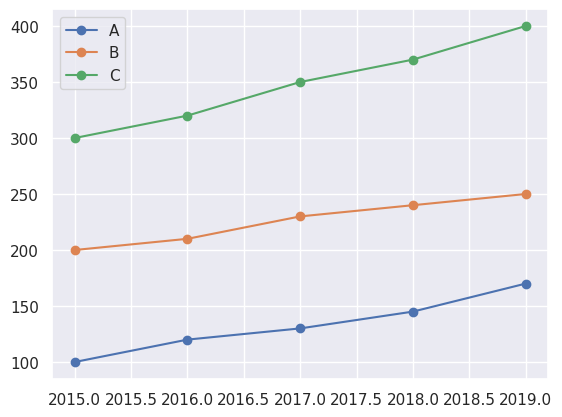

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
for company in df.Company.unique():
    temp_df = df[df.Company ==company]
    plt.plot(temp_df.Year, temp_df.Y ,'-o')
plt.legend(df.Company.unique())
plt.show()

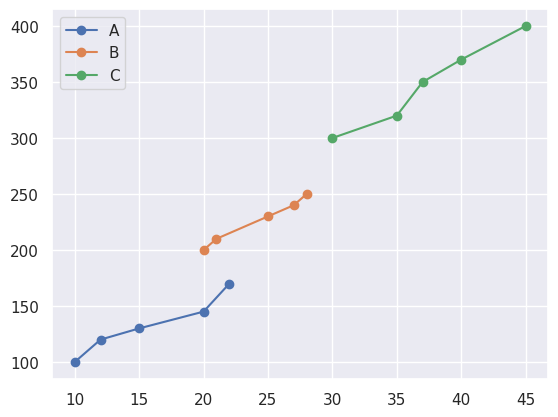

In [13]:
for company in df.Company.unique():
    temp_df = df[df.Company ==company]
    plt.plot(temp_df.X1, temp_df.Y ,'-o')
plt.legend(df.Company.unique())
plt.show()

In [14]:
import pandas as pd
import statsmodels.api as sm
from linearmodels.panel import PanelOLS
# Set the panel data structure (multi-index)
df = df.set_index(['Company', 'Year'])

# Define dependent and independent variables
Y = df['Y']
X = df[['X1', 'X2']]

# Create the panel regression model
model = PanelOLS(Y, X, entity_effects=True)

# Fit the model and print the results
results = model.fit()
print(results)

                          PanelOLS Estimation Summary                           
Dep. Variable:                      Y   R-squared:                        0.9507
Estimator:                   PanelOLS   R-squared (Between):              0.9056
No. Observations:                  15   R-squared (Within):               0.9507
Date:                Wed, Apr 05 2023   R-squared (Overall):              0.9061
Time:                        06:21:34   Log-likelihood                   -48.037
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      96.474
Entities:                           3   P-value                           0.0000
Avg Obs:                       5.0000   Distribution:                    F(2,10)
Min Obs:                       5.0000                                           
Max Obs:                       5.0000   F-statistic (robust):             96.474
                            

In [17]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
df_2 = pd.get_dummies(df.reset_index(), columns=['Company'], drop_first=True)

# Define the regression formula (including the dummy variables for the companies)
formula = 'Y ~ X1 + X2 + Company_B + Company_C'

# Fit the linear regression model
model = ols(formula, df_2).fit()

# Print the results summary
model.summary()

/home/pete/Documents/python_code/pannel_regression/venv_pr/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     595.4
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           7.64e-12
Time:                        06:22:15   Log-Likelihood:                -48.037
No. Observations:                  15   AIC:                             106.1
Df Residuals:                      10   BIC:                             109.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            32.9458      8.796      3.746      0.004      13.348      52.543
Company_B[T.True]    35.0225      8.883      3.943      0.003      15.230      54.815
Company_C[T.True]    77.5764     12.381      6.266      0.000      49.991     105.162
X1                    4.4726      1.462      3.060      0.012       1.216       7.729
X2                    4.0815      3.676      1.110      0.293      -4.108      12.271
==============================================================================
Omnibus:                        1.175   Durbin-Watson:                   1.269
Prob(Omnibus):                  0.556   Jarque-Bera (JB):                0.916
Skew:                          -0.545   Prob(JB):                        0.633
Kurtosis:                       2.473   Cond. No.                         265.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We see in this example our coefficients are the same or the standard linear regression and panel regression. However, this may not always be the case, and there are reasons to use panel regression instead of standard linear regression in certain situations.

Panel regression is particularly useful when you have data that involves both time series and cross-sectional dimensions, such as multiple entities (individuals, firms, or countries) observed over time. In these cases, panel regression can account for the unique characteristics of each entity that are not captured by the independent variables.

Here are some reasons to use panel regression:

Unobserved heterogeneity: Panel regression allows you to account for unobserved factors that may vary across entities but are constant over time (fixed effects) or factors that are constant across entities but vary over time (random effects). This helps control for omitted variable bias and improves the accuracy of the estimated coefficients.

Increased power and efficiency: Panel regression uses information from both the time series and cross-sectional dimensions, which can increase the power and efficiency of the estimates. This can lead to more precise estimates, especially when the number of observations per entity is small.

Dynamic relationships: Panel regression can better capture the dynamic relationships between variables by considering the time dimension, such as lagged effects or the impact of past events on current outcomes.

In summary, while in some cases the estimated coefficients for independent variables might appear similar between standard linear regression and panel regression, panel regression is generally more appropriate and robust when working with data that has both time series and cross-sectional dimensions. It can account for unobserved heterogeneity, provide more efficient estimates, and capture dynamic relationships between variables.